
# Classification Model Development


#### Hult International Business School

#### DAT5303 - MsBA2 - Machine Learning

#### Professor Chase Kusterer

#### Created by: Shuxin Li

#### Date: Jan 21, 2021

In [1]:
# importing libraries
import random as rand                     # random number gen
import pandas as pd                       # data science essentials
import matplotlib.pyplot as plt                      # data visualization
import seaborn as sns                                # enhanced data viz

from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.model_selection import GridSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer              # customizable scorer
from timeit import default_timer as timer

start = timer()

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

# specifying the path and file name
file = './Apprentice_Chef_Dataset.xlsx'

# reading the file into Python
chef = pd.read_excel(file)

# checking the file
chef.head(n = 15)


,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,393.00,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0
1,1365.00,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170
2,800.00,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0
3,600.00,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0
4,1490.00,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205
5,1550.00,1,Genna Lannister,genna.lannister@protonmail.com,Genna,Lannister,36,2,9,1,190.18,1,4,0,1,4,1,0,0,3,1,0,78.8,1,1,3,12,0
6,1430.00,1,Olene Tyrell,olene.tyrell@mcdonalds.com,Olene,Tyrell,61,7,6,2,154.20,1,1,0,1,6,1,45,1,2,1,1,84.8,1,0,3,12,169
7,1321.25,1,Stevron Frey,stevron.frey@travelers.com,Stevron,Frey,13,1,12,3,228.73,1,0,0,1,6,1,13,0,0,0,0,63.0,1,0,1,15,0
8,1505.00,1,Praed,praed@nike.com,Praed,Praed,16,1,12,5,14.26,1,0,0,1,6,1,52,0,1,0,0,63.0,1,0,2,18,0
9,1493.00,0,Alysane Mormont,alysane.mormont@caterpillar.com,Alysane,Mormont,95,3,6,8,49.26,1,0,0,0,6,1,12,0,2,1,0,84.8,1,1,3,14,147


In [2]:
# descriptive statistics for numeric data
chef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REVENUE                      1946 non-null   float64
 1   CROSS_SELL_SUCCESS           1946 non-null   int64  
 2   NAME                         1946 non-null   object 
 3   EMAIL                        1946 non-null   object 
 4   FIRST_NAME                   1946 non-null   object 
 5   FAMILY_NAME                  1899 non-null   object 
 6   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 7   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 8   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 9   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 10  AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 11  MOBILE_NUMBER                1946 non-null   int64  
 12  CANCELLATIONS_BEFORE_NOON    1946 non-null   int64  
 13  CANCELLATIONS_AFTE

## Data Visualization

In [3]:
# subsetting the numerical data from chef
num_chef = chef.drop(['NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME'], axis = 1)
# num_chef.head(n = 15)

/Users/mof/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mof/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/Users/mof/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mof/opt/anaconda3/l

/Users/mof/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mof/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/Users/mof/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mof/opt/anaconda3/l

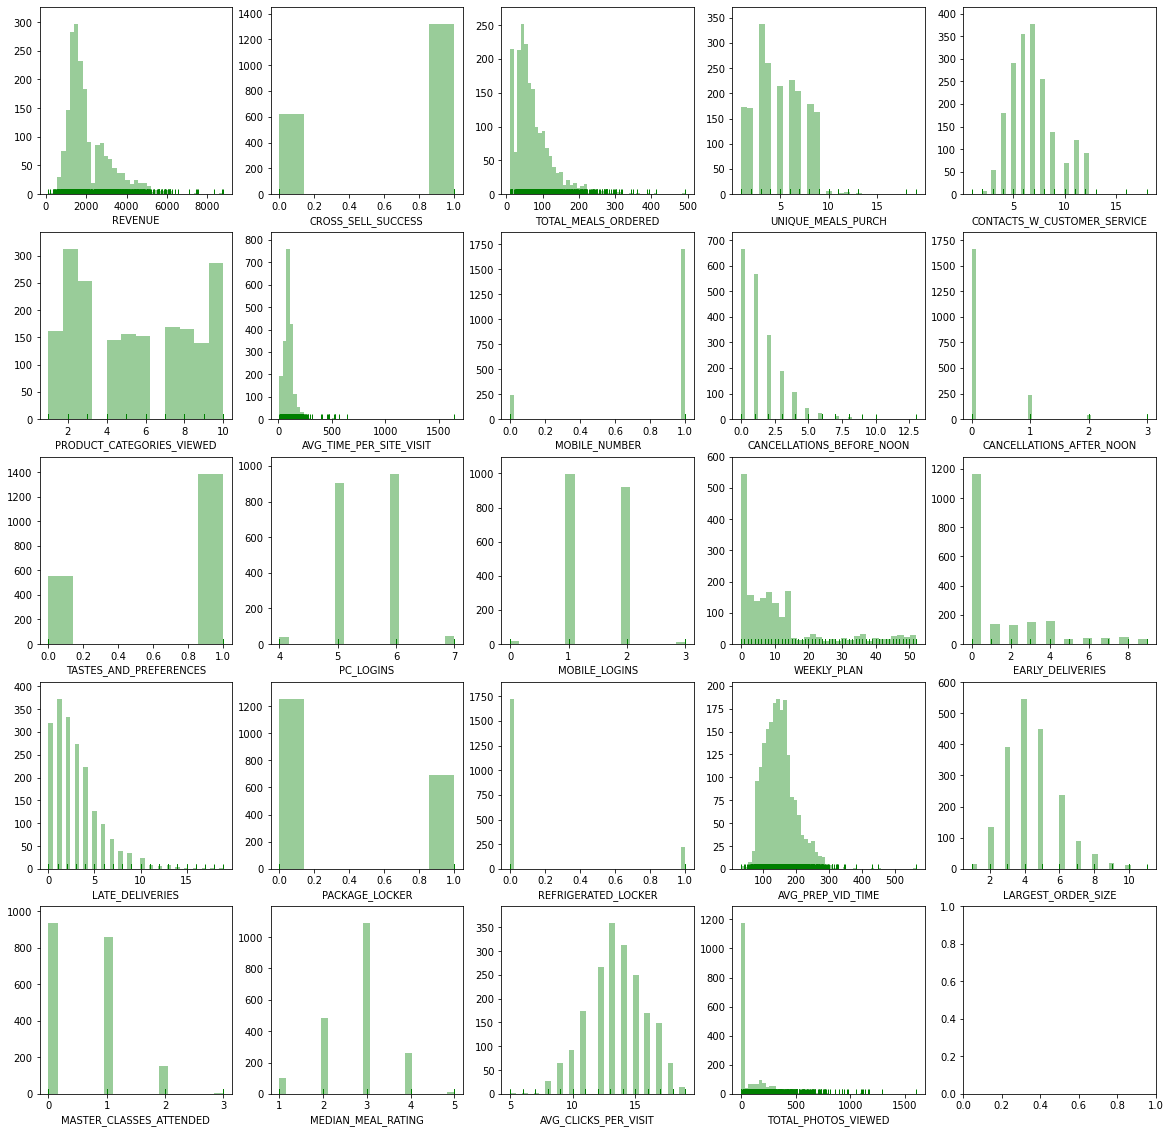

In [4]:
# create a loop to pull histograms to visulaize each numeriable variable 
f, axes = plt.subplots(5, 5, figsize=(20, 20), sharex=False)
for ax, feature in zip(axes.flat, num_chef.columns):
    sns.distplot(num_chef[feature], color="green", kde=False, rug=True, ax=ax)

## Feature Engineering

#### Splitting 'EMAIL':

In [5]:
# splitting emails to Professional, Personal and Junk

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in chef.iterrows():
    
    # splitting email domain at '@'
    split_email = chef.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)

# renaming column to concatenate
email_df.columns = [ '0' , 'EMAIL_DOMAIN' ]


# defining Emails Domain Groups
professional_email_domains = ['@mmm.com', '@amex.com', '@apple.com',
                              '@boeing.com', '@caterpillar.com', '@chevron.com',
                             '@cisco.com', '@cocacola.com', '@disney.com',
                             '@dupont.com', '@exxon.com', '@ge.org', 
                              '@goldmansacs.com', '@homedepot.com', '@ibm.com',
                             '@intel.com', '@jnj.com', '@jpmorgan.com', 
                              '@mcdonalds.com', '@merck.com', '@microsoft.com',
                             '@nike.com', '@pfizer.com', '@pg.com', 
                              '@travelers.com', '@unitedtech.com', '@unitedhealth.com',
                              '@verizon.com','@visa.com', '@walmart.com']

personal_email_domains     = ['@gmail.com', '@yahoo.com', '@protonmail.com']

junk_email_domains         = ['@me.com', '@aol.com', '@hotmail.com', 
                              '@live.com', '@msn.com', '@passport.com']

# resenting placeholderlist
placeholder_lst = []

# looping to group observations by domain type
for domain in email_df['EMAIL_DOMAIN']:
        if  '@' + domain in professional_email_domains:
            placeholder_lst.append('PROFESSIONAL')
        
        elif '@' + domain in personal_email_domains:
            placeholder_lst.append('PERSONAL')
            
        elif '@' + domain in junk_email_domains:
            placeholder_lst.append('JUNK')
            
        else:
            placeholder_lst.append('Unknown_email')

# concatenating with original DataFrame
chef['DOMAIN_GROUP'] = pd.Series(placeholder_lst)

# checking results
chef['DOMAIN_GROUP'].value_counts()

# one hot encoding 
one_domain_email = pd.get_dummies(chef['DOMAIN_GROUP'])

# dropping categorical variables after they've been encoded
chef = chef.drop('DOMAIN_GROUP', axis = 1)

# joining codings together
chef = chef.join([one_domain_email])


####  create new variables in our dataset:

In [6]:
# create new variables
chef['total_cancellation'] = chef['CANCELLATIONS_BEFORE_NOON'] + chef['CANCELLATIONS_AFTER_NOON']
chef['total_locker'] = chef['PACKAGE_LOCKER'] + chef['REFRIGERATED_LOCKER']
chef['avg_sp_meal'] = chef['REVENUE'] / chef['TOTAL_MEALS_ORDERED']

#### create dummy variables based on their trends:

In [7]:
# Create dummy variables
chef['d_AVG_CLICKS_PER_VISIT'] = 0
chef['d_AVG_PREP_VID_TIME'] = 0
chef['d_AVG_TIME_PER_SITE_VISIT'] = 0
chef['d_CANCELLATIONS_BEFORE_NOON'] = 0
chef['d_CONTACTS_W_CUSTOMER_SERVICE'] = 0
chef['d_LARGEST_ORDER_SIZE'] = 0
chef['d_LATE_DELIVERIES'] = 0
chef['d_TOTAL_PHOTOS_VIEWED'] = 0
chef['d_EARLY_DELIVERIES'] = 0
chef['d_UNIQUE_MEALS_PURCH'] = 0
chef['d_MASTER_CLASSES_ATTENDED'] = 0
chef['d_MEDIAN_MEAL_RATING'] = 0



# Create a for loop for the dummy variables, iterating each column to change values in the new column
for index, value in chef.iterrows():
    
    # create a if statement for UNIQUE_MEALS_PURCH
    if chef.loc[index, 'UNIQUE_MEALS_PURCH'] > 9:
        chef.loc[index, 'd_UNIQUE_MEALS_PURCH'] = 1
    
    # create a if statement for CONTACTS_W_CUSTOMER_SERVICE
    if chef.loc[index, 'CONTACTS_W_CUSTOMER_SERVICE'] > 10:
        chef.loc[index, 'd_CONTACTS_W_CUSTOMER_SERVICE'] = 1
        
    # create a if statement for CANCELLATIONS_BEFORE_NOON
    if chef.loc[index, 'CANCELLATIONS_BEFORE_NOON'] > 6:
        chef.loc[index, 'd_CANCELLATIONS_BEFORE_NOON'] = 1
       
    # create a if statement for LARGEST_ORDER_SIZE
    if chef.loc[index, 'LARGEST_ORDER_SIZE'] > 7:
        chef.loc[index, 'd_LARGEST_ORDER_SIZE'] = 1
      
    # create a if statement for MASTER_CLASSES_ATTENDED
    if chef.loc[index, 'MASTER_CLASSES_ATTENDED'] > 0:
        chef.loc[index, 'd_MASTER_CLASSES_ATTENDED'] = 1
     
    # create a if statement for MEDIAN_MEAL_RATING
    if chef.loc[index, 'MEDIAN_MEAL_RATING'] > 3:
        chef.loc[index, 'd_MEDIAN_MEAL_RATING'] = 1
        
    # create a if statement for AVG_CLICKS_PER_VISIT
    if chef.loc[index, 'AVG_CLICKS_PER_VISIT'] > 11:
        chef.loc[index, 'd_AVG_CLICKS_PER_VISIT'] = 1 
        
    # create a if statement for AVG_TIME_PER_SITE_VISIT
    if chef.loc[index, 'AVG_TIME_PER_SITE_VISIT'] > 200:
        chef.loc[index, 'd_AVG_TIME_PER_SITE_VISIT'] = 1
        
    # create a if statement for AVG_PREP_VID_TIME
    if chef.loc[index, 'AVG_PREP_VID_TIME'] > 200:
        chef.loc[index, 'd_AVG_PREP_VID_TIME'] = 1
       
    # create a if statement for TOTAL_PHOTOS_VIEWED
    if chef.loc[index, 'TOTAL_PHOTOS_VIEWED'] > 0:
        chef.loc[index, 'd_TOTAL_PHOTOS_VIEWED'] = 1
        
    # create a if statement for EARLY_DELIVERIES
    if chef.loc[index, 'EARLY_DELIVERIES'] > 4:
        chef.loc[index, 'd_EARLY_DELIVERIES'] = 1
      
    # create a if statement for LATE_DELIVERIES
    if chef.loc[index, 'LATE_DELIVERIES'] > 8:
        chef.loc[index, 'd_LATE_DELIVERIES'] = 1
        
    # create a if statement for TOTAL_PHOTOS_VIEWED
    if chef.loc[index, 'EARLY_DELIVERIES'] > 1:
        chef.loc[index, 'd_EARLY_DELIVERIES'] = 1
      
    # create a if statement for LATE_DELIVERIES
    if chef.loc[index, 'LATE_DELIVERIES'] > 1:
        chef.loc[index, 'd_LATE_DELIVERIES'] = 1

#### create outlier variables:

In [8]:
# create the outlier threshold
out_AVG_TIME_PER_SITE_VISIT = 300          
out_AVG_PREP_VID_TIME = 400          
out_TOTAL_MEALS_ORDERED = 200          
out_TOTAL_PHOTOS_VIEWED = 500          
out_AVG_CLICKS_PER_VISIT  = 11           
out_CONTACTS_W_CUSTOMER_SERVICE = 10           
out_LARGEST_ORDER_SIZE = 7            

chef['out_AVG_TIME_PER_SITE_VISIT'] = 0
chef['out_AVG_PREP_VID_TIME'] = 0
chef['out_TOTAL_MEALS_ORDERED'] = 0
chef['out_AVG_CLICKS_PER_VISIT'] = 0
chef['out_TOTAL_PHOTOS_VIEWED'] = 0
chef['out_CONTACTS_W_CUSTOMER_SERVICE'] = 0
chef['out_LARGEST_ORDER_SIZE'] = 0


# iterating through each variable above to fill in dummies
for index, value in chef.iterrows():
        
    # filling in 'out_AVG_PREP_VID_TIME'
    if chef.loc[index, 'AVG_TIME_PER_SITE_VISIT'] > out_AVG_TIME_PER_SITE_VISIT:
        chef.loc[index, 'out_AVG_TIME_PER_SITE_VISIT'] =1
    
    # filling in 'out_AVG_TIME_PER_SITE_VISIT'
    if chef.loc[index, 'AVG_PREP_VID_TIME'] > out_AVG_PREP_VID_TIME:
        chef.loc[index, 'out_AVG_PREP_VID_TIME'] =1
    
    # filling in 'trend_AVG_PREP_VID_TIME'
    if chef.loc[index, 'TOTAL_MEALS_ORDERED'] > out_TOTAL_MEALS_ORDERED:
        chef.loc[index, 'out_TOTAL_MEALS_ORDERED'] =1
    
    # filling in 'trend_AVG_TIME_PER_SITE_VISIT'
    if chef.loc[index, 'AVG_CLICKS_PER_VISIT'] > out_AVG_CLICKS_PER_VISIT:
        chef.loc[index, 'out_AVG_CLICKS_PER_VISIT'] =1
        
    # filling in 'trend_AVG_TIME_PER_SITE_VISIT'
    if chef.loc[index, 'TOTAL_PHOTOS_VIEWED'] > out_TOTAL_PHOTOS_VIEWED:
        chef.loc[index, 'out_TOTAL_PHOTOS_VIEWED'] =1
    
    # filling in 'trend_AVG_TIME_PER_SITE_VISIT'
    if chef.loc[index, 'CONTACTS_W_CUSTOMER_SERVICE'] > out_CONTACTS_W_CUSTOMER_SERVICE:
        chef.loc[index, 'out_CONTACTS_W_CUSTOMER_SERVICE'] =1
    
    # filling in 'trend_AVG_TIME_PER_SITE_VISIT'
    if chef.loc[index, 'LARGEST_ORDER_SIZE'] > out_LARGEST_ORDER_SIZE:
        chef.loc[index, 'out_LARGEST_ORDER_SIZE'] =1
        

#### checking the correlation between Y-variable and X-variabels

In [9]:
# creating a (Pearson) correlation matrix
chef_corr = chef.corr().round(2)


# printing (Pearson) correlations with REVENUE
print(chef_corr.loc['CROSS_SELL_SUCCESS'].sort_values(ascending = False))

CROSS_SELL_SUCCESS                 1.00
PROFESSIONAL                       0.19
CANCELLATIONS_BEFORE_NOON          0.16
total_cancellation                 0.14
MOBILE_NUMBER                      0.10
TASTES_AND_PREFERENCES             0.08
REFRIGERATED_LOCKER                0.07
d_CANCELLATIONS_BEFORE_NOON        0.06
total_locker                       0.06
d_MASTER_CLASSES_ATTENDED          0.05
CONTACTS_W_CUSTOMER_SERVICE        0.04
PERSONAL                           0.04
PACKAGE_LOCKER                     0.04
PC_LOGINS                          0.04
MASTER_CLASSES_ATTENDED            0.04
AVG_PREP_VID_TIME                  0.03
MEDIAN_MEAL_RATING                 0.03
EARLY_DELIVERIES                   0.02
LARGEST_ORDER_SIZE                 0.02
d_MEDIAN_MEAL_RATING               0.02
d_AVG_TIME_PER_SITE_VISIT          0.01
d_LATE_DELIVERIES                  0.01
d_TOTAL_PHOTOS_VIEWED              0.01
d_EARLY_DELIVERIES                 0.01
LATE_DELIVERIES                    0.01



## Logistic Regression Modeling


In [10]:
# declaring explanatory variables. RECYCLING app_chef_data
chef_data = chef.drop(['CROSS_SELL_SUCCESS',
                      'NAME',
                      'EMAIL',
                      'FIRST_NAME',
                      'FAMILY_NAME'], 
                      axis = 1)


# declaring response variable
chef_target = chef.loc[: , 'CROSS_SELL_SUCCESS']


# train-test split with stratification to avoid category imbalance
X_train, X_test, y_train, y_test= train_test_split(
            chef_data,
            chef_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = chef_target) # helps prevent response imbalance


# merging training data for statsmodels
chef_train = pd.concat([X_train, y_train], axis = 1)

In [11]:
# for val in chef_data:
#     print(f" {val} + ")

In [12]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """  CROSS_SELL_SUCCESS ~
                                         REVENUE + 
                                         TOTAL_MEALS_ORDERED + 
                                         UNIQUE_MEALS_PURCH + 
                                         CONTACTS_W_CUSTOMER_SERVICE + 
                                         PRODUCT_CATEGORIES_VIEWED + 
                                         AVG_TIME_PER_SITE_VISIT + 
                                         MOBILE_NUMBER + 
                                         CANCELLATIONS_BEFORE_NOON + 
                                         CANCELLATIONS_AFTER_NOON + 
                                         TASTES_AND_PREFERENCES + 
                                         PC_LOGINS + 
                                         MOBILE_LOGINS + 
                                         WEEKLY_PLAN + 
                                         EARLY_DELIVERIES + 
                                         LATE_DELIVERIES + 
                                         PACKAGE_LOCKER + 
                                         REFRIGERATED_LOCKER + 
                                         AVG_PREP_VID_TIME + 
                                         LARGEST_ORDER_SIZE + 
                                         MASTER_CLASSES_ATTENDED + 
                                         MEDIAN_MEAL_RATING + 
                                         AVG_CLICKS_PER_VISIT + 
                                         TOTAL_PHOTOS_VIEWED + 
                                         PERSONAL + 
                                         PROFESSIONAL + 
                                         total_cancellation + 
                                         total_locker + 
                                         avg_sp_meal + 
                                         d_AVG_CLICKS_PER_VISIT + 
                                         d_AVG_PREP_VID_TIME + 
                                         d_AVG_TIME_PER_SITE_VISIT + 
                                         d_CANCELLATIONS_BEFORE_NOON + 
                                         d_CONTACTS_W_CUSTOMER_SERVICE + 
                                         d_LARGEST_ORDER_SIZE + 
                                         d_LATE_DELIVERIES + 
                                         d_TOTAL_PHOTOS_VIEWED + 
                                         d_EARLY_DELIVERIES + 
                                         d_UNIQUE_MEALS_PURCH + 
                                         d_MASTER_CLASSES_ATTENDED + 
                                         d_MEDIAN_MEAL_RATING + 
                                         out_AVG_TIME_PER_SITE_VISIT + 
                                         out_AVG_PREP_VID_TIME + 
                                         out_TOTAL_MEALS_ORDERED + 
                                         out_AVG_CLICKS_PER_VISIT + 
                                         out_TOTAL_PHOTOS_VIEWED + 
                                         out_CONTACTS_W_CUSTOMER_SERVICE + 
                                         out_LARGEST_ORDER_SIZE""",
                                         data    = chef_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary()

Optimization terminated successfully.
         Current function value: 0.543340
         Iterations 17


/Users/mof/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1416
Method:                           MLE   Df Model:                           42
Date:                Wed, 27 Jan 2021   Pseudo R-squ.:                  0.1348
Time:                        15:41:15   Log-Likelihood:                -792.73
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 7.979e-31
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -3.9240      1.444     -2.717      0.007      -6.755      -1.093
REVENUE                            -0.0001      0.000     -0.899      0.369      -0.000       0.000
TOTAL_MEALS_ORDERED                 0.0011      0.003      0.355      0.723      -0.005       0.007
UNIQUE_MEALS_PURCH                 -0.0176      0.028     -0.636      0.525      -0.072       0.037
CONTACTS_W_CUSTOMER_SERVICE         0.0623      0.047      1.323      0.186      -0.030       0.155
PRODUCT_CATEGORIES_VIEWED          -0.0161      0.021     -0.776      0.438      -0.057       0.025
AVG_TIME_PER_SITE_VISIT             0.0002      0.001      0.159      0.874      -0.003       0.003
MOBILE_NUMBER                       0.8869      0.180      4.931      0.000       0.534       1.239
CANCELLATIONS_BEFORE_NOON           0.2502        nan        nan        nan         nan         nan
CANCELLATIONS_AFTER_NOON           -0.2336        nan        nan        nan         nan         nan
TASTES_AND_PREFERENCES              0.3463      0.136      2.538      0.011       0.079       0.614
PC_LOGINS                           0.2786      0.109      2.561      0.010       0.065       0.492
MOBILE_LOGINS                      -0.2065      0.119     -1.735      0.083      -0.440       0.027
WEEKLY_PLAN                         0.0054      0.005      1.155      0.248      -0.004       0.015
EARLY_DELIVERIES                    0.0828      0.053      1.556      0.120      -0.021       0.187
LATE_DELIVERIES                    -0.0114      0.030     -0.378      0.705      -0.071       0.048
PACKAGE_LOCKER                     -0.1177        nan        nan        nan         nan         nan
REFRIGERATED_LOCKER                 0.2692        nan        nan        nan         nan         nan
AVG_PREP_VID_TIME                   0.0054      0.003      1.667      0.096      -0.001       0.012
LARGEST_ORDER_SIZE                 -0.0355      0.079     -0.447      0.655      -0.191       0.120
MASTER_CLASSES_ATTENDED            -0.1572      0.237     -0.662      0.508      -0.622       0.308
MEDIAN_MEAL_RATING                  0.0894      0.187      0.478      0.633      -0.277       0.456
AVG_CLICKS_PER_VISIT               -0.0190      0.059     -0.321      0.749      -0.135       0.097
TOTAL_PHOTOS_VIEWED              1.575e-05      0.001      0.021      0.984      -0.001       0.002
PERSONAL                            1.3494      0.160      8.424      0.000       1.035       1.663
PROFESSIONAL                        1.8975      0.173     10.949      0.000       1.558       2.237
total_cancellation                  0.0166        nan        nan        nan         nan         nan
total_locker                        0.1515        nan        nan        nan         nan         nan
avg_sp_meal                        -0.0057      0.007     -0.797      0.425      -0.020       0.008
d_AVG_CLICKS_PER_VISIT              0.010

In [13]:
# instantiating a logistic regression model object
logistic_sig = smf.logit(formula = """  CROSS_SELL_SUCCESS ~
                                         REVENUE + 
                                         CONTACTS_W_CUSTOMER_SERVICE + 
                                         PRODUCT_CATEGORIES_VIEWED +
                                         MOBILE_NUMBER + 
                                         CANCELLATIONS_AFTER_NOON + 
                                         TASTES_AND_PREFERENCES + 
                                         PC_LOGINS + 
                                         MOBILE_LOGINS + 
                                         REFRIGERATED_LOCKER + 
                                         AVG_PREP_VID_TIME +  
                                         AVG_CLICKS_PER_VISIT + 
                                         PERSONAL + 
                                         PROFESSIONAL + 
                                         total_cancellation + 
                                         avg_sp_meal +  
                                         d_CANCELLATIONS_BEFORE_NOON + 
                                         d_LATE_DELIVERIES + 
                                         d_EARLY_DELIVERIES + 
                                         d_MASTER_CLASSES_ATTENDED + 
                                         out_TOTAL_MEALS_ORDERED + 
                                         out_TOTAL_PHOTOS_VIEWED""",
                                         data    = chef_train)


# fitting the model object
results_sig = logistic_sig.fit()


# checking the results SUMMARY
results_sig.summary()

Optimization terminated successfully.
         Current function value: 0.546317
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1437
Method:                           MLE   Df Model:                           21
Date:                Wed, 27 Jan 2021   Pseudo R-squ.:                  0.1300
Time:                        15:41:15   Log-Likelihood:                -797.08
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 9.364e-39
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -3.1155      0.920     -3.386      0.001      -4.919      -1.312
REVENUE                     -8.695e-05   8.34e-05     -1.042      0.297      -0.000    7.66e-05
CONTACTS_W_CUSTOMER_SERVICE     0.0803      0.031      2.567      0.010       0.019       0.142
PRODUCT_CATEGORIES_VIEWED      -0.0191      0.020     -0.942      0.346      -0.059       0.021
MOBILE_NUMBER                   0.8917      0.177      5.051      0.000       0.546       1.238
CANCELLATIONS_AFTER_NOON       -0.4784      0.150     -3.198      0.001      -0.772      -0.185
TASTES_AND_PREFERENCES          0.3433      0.135      2.539      0.011       0.078       0.608
PC_LOGINS                       0.2628      0.108      2.439      0.015       0.052       0.474
MOBILE_LOGINS                  -0.1895      0.117     -1.622      0.105      -0.419       0.040
REFRIGERATED_LOCKER             0.4285      0.208      2.058      0.040       0.020       0.837
AVG_PREP_VID_TIME               0.0030      0.002      1.713      0.087      -0.000       0.006
AVG_CLICKS_PER_VISIT           -0.0416      0.032     -1.279      0.201      -0.105       0.022
PERSONAL                        1.3185      0.157      8.387      0.000       1.010       1.627
PROFESSIONAL                    1.8789      0.171     10.960      0.000       1.543       2.215
total_cancellation              0.2654      0.049      5.402      0.000       0.169       0.362
avg_sp_meal                    -0.0064      0.004     -1.664      0.096      -0.014       0.001
d_CANCELLATIONS_BEFORE_NOON     0.5746      1.131      0.508      0.611      -1.643       2.792
d_LATE_DELIVERIES               0.1374      0.128      1.071      0.284      -0.114       0.389
d_EARLY_DELIVERIES              0.2184      0.133      1.637      0.102      -0.043       0.480
d_MASTER_CLASSES_ATTENDED       0.2472      0.144      1.714      0.086      -0.035       0.530
out_TOTAL_MEALS_ORDERED        -0.9306      0.335     -2.780      0.005      -1.587      -0.275
out_TOTAL_PHOTOS_VIEWED        -0.4075      0.317     -1.286      0.199      -1.029       0.214
===============================================================================================
"""

In [14]:
# prepare significant variables data
chef_data_full    = chef.loc[ : , ['REVENUE','TOTAL_MEALS_ORDERED','UNIQUE_MEALS_PURCH',
                                   'CONTACTS_W_CUSTOMER_SERVICE','PRODUCT_CATEGORIES_VIEWED',
                                   'AVG_TIME_PER_SITE_VISIT','MOBILE_NUMBER','CANCELLATIONS_BEFORE_NOON', 
                                   'CANCELLATIONS_AFTER_NOON','TASTES_AND_PREFERENCES',
                                   'PC_LOGINS','MOBILE_LOGINS','WEEKLY_PLAN','EARLY_DELIVERIES',
                                   'LATE_DELIVERIES','PACKAGE_LOCKER','REFRIGERATED_LOCKER',
                                   'AVG_PREP_VID_TIME','LARGEST_ORDER_SIZE','MASTER_CLASSES_ATTENDED',
                                   'MEDIAN_MEAL_RATING','AVG_CLICKS_PER_VISIT','TOTAL_PHOTOS_VIEWED', 
                                   'PERSONAL','PROFESSIONAL','total_cancellation','total_locker','avg_sp_meal', 
                                   'd_AVG_CLICKS_PER_VISIT','d_AVG_PREP_VID_TIME','d_AVG_TIME_PER_SITE_VISIT', 
                                   'd_CANCELLATIONS_BEFORE_NOON','d_CONTACTS_W_CUSTOMER_SERVICE','d_LARGEST_ORDER_SIZE', 
                                   'd_LATE_DELIVERIES','d_TOTAL_PHOTOS_VIEWED','d_EARLY_DELIVERIES','d_UNIQUE_MEALS_PURCH', 
                                   'd_MASTER_CLASSES_ATTENDED','d_MEDIAN_MEAL_RATING','out_AVG_TIME_PER_SITE_VISIT', 
                                   'out_AVG_PREP_VID_TIME','out_TOTAL_MEALS_ORDERED','out_AVG_CLICKS_PER_VISIT', 
                                   'out_TOTAL_PHOTOS_VIEWED','out_CONTACTS_W_CUSTOMER_SERVICE','out_LARGEST_ORDER_SIZE']]

chef_data_sig_1   =  chef.loc[ : , ['REVENUE','TOTAL_MEALS_ORDERED','UNIQUE_MEALS_PURCH',
                                    'CONTACTS_W_CUSTOMER_SERVICE','PRODUCT_CATEGORIES_VIEWED',
                                    'AVG_TIME_PER_SITE_VISIT','MOBILE_NUMBER','CANCELLATIONS_BEFORE_NOON', 
                                    'CANCELLATIONS_AFTER_NOON','TASTES_AND_PREFERENCES',
                                    'PC_LOGINS','MOBILE_LOGINS','WEEKLY_PLAN','EARLY_DELIVERIES',
                                    'LATE_DELIVERIES','PACKAGE_LOCKER','REFRIGERATED_LOCKER',
                                    'AVG_PREP_VID_TIME','LARGEST_ORDER_SIZE','MASTER_CLASSES_ATTENDED',
                                    'MEDIAN_MEAL_RATING','AVG_CLICKS_PER_VISIT','TOTAL_PHOTOS_VIEWED', 
                                    'PERSONAL','PROFESSIONAL','total_cancellation','total_locker','avg_sp_meal']]

chef_data_sig_2   =  chef.loc[ : , ['REVENUE','MOBILE_NUMBER','MOBILE_LOGINS','CANCELLATIONS_BEFORE_NOON',
                                     'TASTES_AND_PREFERENCES','PC_LOGINS','d_MASTER_CLASSES_ATTENDED',
                                     'PERSONAL','PROFESSIONAL','total_cancellation','CANCELLATIONS_AFTER_NOON',
                                     'd_EARLY_DELIVERIES','LATE_DELIVERIES','total_locker','avg_sp_meal',
                                     'total_cancellation','out_AVG_PREP_VID_TIME','out_LARGEST_ORDER_SIZE']]

chef_data_sig_3   =  chef.loc[ : , ['REVENUE','CONTACTS_W_CUSTOMER_SERVICE','MOBILE_NUMBER','CANCELLATIONS_AFTER_NOON',
                                     'TASTES_AND_PREFERENCES','PC_LOGINS','EARLY_DELIVERIES','AVG_PREP_VID_TIME',
                                     'PERSONAL','PROFESSIONAL','MOBILE_LOGINS','CANCELLATIONS_AFTER_NOON',
                                     'd_EARLY_DELIVERIES','LATE_DELIVERIES','total_locker','out_TOTAL_MEALS_ORDERED',
                                     'avg_sp_meal','d_MASTER_CLASSES_ATTENDED']]

chef_data_sig_4   =  chef.loc[ : , ['REVENUE','CONTACTS_W_CUSTOMER_SERVICE','PRODUCT_CATEGORIES_VIEWED','MOBILE_NUMBER','CANCELLATIONS_AFTER_NOON',
                                     'TASTES_AND_PREFERENCES','PC_LOGINS','MOBILE_LOGINS','AVG_PREP_VID_TIME',
                                     'AVG_PREP_VID_TIME','PERSONAL','PROFESSIONAL','total_cancellation','avg_sp_meal',
                                     'd_EARLY_DELIVERIES','d_MASTER_CLASSES_ATTENDED','out_TOTAL_PHOTOS_VIEWED','out_TOTAL_MEALS_ORDERED']]


chef_data_sig_5   =  chef.loc[ : , ['REVENUE','MOBILE_NUMBER','MOBILE_LOGINS','CANCELLATIONS_BEFORE_NOON',
                                    'TASTES_AND_PREFERENCES','PC_LOGINS','d_MASTER_CLASSES_ATTENDED',
                                    'PERSONAL','PROFESSIONAL','MOBILE_LOGINS','CANCELLATIONS_AFTER_NOON',
                                    'd_EARLY_DELIVERIES','LATE_DELIVERIES','REFRIGERATED_LOCKER','total_cancellation',
                                    'out_TOTAL_MEALS_ORDERED']]


In [15]:
# # explanatory sets from last session

# # creating a dictionary to store candidate models

# candidate_dict = {

# #  full model
#     'logit_full' : ['REVENUE','TOTAL_MEALS_ORDERED','UNIQUE_MEALS_PURCH',
#                    'CONTACTS_W_CUSTOMER_SERVICE','PRODUCT_CATEGORIES_VIEWED',
#                    'AVG_TIME_PER_SITE_VISIT','MOBILE_NUMBER','CANCELLATIONS_BEFORE_NOON', 
#                    'CANCELLATIONS_AFTER_NOON','TASTES_AND_PREFERENCES',
#                    'PC_LOGINS','MOBILE_LOGINS','WEEKLY_PLAN','EARLY_DELIVERIES',
#                    'LATE_DELIVERIES','PACKAGE_LOCKER','REFRIGERATED_LOCKER',
#                    'AVG_PREP_VID_TIME','LARGEST_ORDER_SIZE','MASTER_CLASSES_ATTENDED',
#                    'MEDIAN_MEAL_RATING','AVG_CLICKS_PER_VISIT','TOTAL_PHOTOS_VIEWED', 
#                    'PERSONAL','PROFESSIONAL','total_cancellation','total_locker','avg_sp_meal', 
#                    'd_AVG_CLICKS_PER_VISIT','d_AVG_PREP_VID_TIME','d_AVG_TIME_PER_SITE_VISIT', 
#                    'd_CANCELLATIONS_BEFORE_NOON','d_CONTACTS_W_CUSTOMER_SERVICE','d_LARGEST_ORDER_SIZE', 
#                    'd_LATE_DELIVERIES','d_TOTAL_PHOTOS_VIEWED','d_EARLY_DELIVERIES','d_UNIQUE_MEALS_PURCH', 
#                    'd_MASTER_CLASSES_ATTENDED','d_MEDIAN_MEAL_RATING','out_AVG_TIME_PER_SITE_VISIT', 
#                    'out_AVG_PREP_VID_TIME','out_TOTAL_MEALS_ORDERED','out_AVG_CLICKS_PER_VISIT', 
#                    'out_TOTAL_PHOTOS_VIEWED','out_CONTACTS_W_CUSTOMER_SERVICE','out_LARGEST_ORDER_SIZE'],
 

#  # significant variables only (set 1)
#     'logit_sig_1' : ['REVENUE','TOTAL_MEALS_ORDERED','UNIQUE_MEALS_PURCH',
#                    'CONTACTS_W_CUSTOMER_SERVICE','PRODUCT_CATEGORIES_VIEWED',
#                    'AVG_TIME_PER_SITE_VISIT','MOBILE_NUMBER','CANCELLATIONS_BEFORE_NOON', 
#                    'CANCELLATIONS_AFTER_NOON','TASTES_AND_PREFERENCES',
#                    'PC_LOGINS','MOBILE_LOGINS','WEEKLY_PLAN','EARLY_DELIVERIES',
#                    'LATE_DELIVERIES','PACKAGE_LOCKER','REFRIGERATED_LOCKER',
#                    'AVG_PREP_VID_TIME','LARGEST_ORDER_SIZE','MASTER_CLASSES_ATTENDED',
#                    'MEDIAN_MEAL_RATING','AVG_CLICKS_PER_VISIT','TOTAL_PHOTOS_VIEWED', 
#                    'PERSONAL','PROFESSIONAL','total_cancellation','total_locker','avg_sp_meal'],
    
    
# # significant variables only (set 2)
#     'logit_sig_2' : ['REVENUE','MOBILE_NUMBER','MOBILE_LOGINS','CANCELLATIONS_BEFORE_NOON',
#                      'TASTES_AND_PREFERENCES','PC_LOGINS','d_MASTER_CLASSES_ATTENDED',
#                      'PERSONAL','PROFESSIONAL','total_cancellation','CANCELLATIONS_AFTER_NOON',
#                      'd_EARLY_DELIVERIES','LATE_DELIVERIES','total_locker','avg_sp_meal',
#                      'total_cancellation','out_AVG_PREP_VID_TIME','out_LARGEST_ORDER_SIZE'],

# # significant variables only (set 3)
#     'logit_sig_3' : ['REVENUE','CONTACTS_W_CUSTOMER_SERVICE','MOBILE_NUMBER','CANCELLATIONS_AFTER_NOON',
#                      'TASTES_AND_PREFERENCES','PC_LOGINS','EARLY_DELIVERIES','AVG_PREP_VID_TIME',
#                      'PERSONAL','PROFESSIONAL','MOBILE_LOGINS','CANCELLATIONS_AFTER_NOON',
#                      'd_EARLY_DELIVERIES','LATE_DELIVERIES','total_locker','out_TOTAL_MEALS_ORDERED',
#                      'avg_sp_meal','d_MASTER_CLASSES_ATTENDED'],
    
# # significant variables only (set 4)
#     'logit_sig_4' : ['REVENUE','CONTACTS_W_CUSTOMER_SERVICE','PRODUCT_CATEGORIES_VIEWED','MOBILE_NUMBER','CANCELLATIONS_AFTER_NOON',
#                      'TASTES_AND_PREFERENCES','PC_LOGINS','MOBILE_LOGINS','AVG_PREP_VID_TIME',
#                      'AVG_PREP_VID_TIME','PERSONAL','PROFESSIONAL','total_cancellation','avg_sp_meal',
#                      'd_EARLY_DELIVERIES','d_MASTER_CLASSES_ATTENDED','out_TOTAL_PHOTOS_VIEWED','out_TOTAL_MEALS_ORDERED'],
    
# # significant variables only (set 5)
#     'logit_sig_5' : ['REVENUE','MOBILE_NUMBER','MOBILE_LOGINS','CANCELLATIONS_BEFORE_NOON',
#                      'TASTES_AND_PREFERENCES','PC_LOGINS','d_MASTER_CLASSES_ATTENDED',
#                      'PERSONAL','PROFESSIONAL','MOBILE_LOGINS','CANCELLATIONS_AFTER_NOON',
#                      'd_EARLY_DELIVERIES','LATE_DELIVERIES','REFRIGERATED_LOCKER','total_cancellation',
#                      'out_TOTAL_MEALS_ORDERED']
    
#  }

In [16]:
# create a user define function for logitstic regression
def logit_model (dataset = None):
    
    # declaring response variable
    chef_target = chef.loc[ : , 'CROSS_SELL_SUCCESS']

    # train/test split dataset
    X_train, X_test, y_train, y_test = train_test_split(
                dataset,
                chef_target,
                random_state = 219,
                test_size    = 0.25,
                stratify     = chef_target)


    # INSTANTIATING a logistic regression model
    logreg = LogisticRegression(solver = 'newton-cg',
                                C = 3.9,
                                random_state = 219,
                                warm_start = True)

    # FITTING the training data
    logreg_fit = logreg.fit(X_train, y_train)


    # PREDICTING based on the testing set
    logreg_pred = logreg_fit.predict(X_test)


    # SCORING the results
    print('LogReg Training ACCURACY:', logreg_fit.score(X_train, y_train).round(4))
    print('LogReg Testing  ACCURACY:', logreg_fit.score(X_test, y_test).round(4))
    print('LogReg AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = logreg_pred).round(4))

    # saving scoring data for future use
    logreg_train_score = logreg_fit.score(X_train, y_train).round(4) # accuracy
    logreg_test_score  = logreg_fit.score(X_test, y_test).round(4)   # accuracy


    # displaying and saving the gap between training and testing
    print('LogReg Train-Test Gap   :', abs(logreg_train_score - logreg_test_score).round(3))
    logreg_test_gap = abs(logreg_train_score - logreg_test_score).round(3)
    
    # unpacking the confusion matrix
    logreg_tn, \
    logreg_fp, \
    logreg_fn, \
    logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


    # printing each result one-by-one
    print(f"""
    True Negatives : {logreg_tn}
    False Positives: {logreg_fp}
    False Negatives: {logreg_fn}
    True Positives : {logreg_tp}
    """)


In [17]:
logit_model (dataset = chef_data_full)
print("X_VARIABLES: chef_data_full")

logit_model (dataset = chef_data_sig_1)
print("\nX_VARIABLES: chef_data_sig_1")

logit_model (dataset = chef_data_sig_2)
print("\nX_VARIABLES: chef_data_sig_2")

logit_model (dataset = chef_data_sig_3)
print("\nX_VARIABLES: chef_data_sig_3")

logit_model (dataset = chef_data_sig_4)
print("\nX_VARIABLES: chef_data_sig_4")

logit_model (dataset = chef_data_sig_5)
print("\nX_VARIABLES: chef_data_sig_5")


LogReg Training ACCURACY: 0.7389
LogReg Testing  ACCURACY: 0.7228
LogReg AUC Score        : 0.6181
LogReg Train-Test Gap   : 0.016

    True Negatives : 51
    False Positives: 105
    False Negatives: 30
    True Positives : 301
    
X_VARIABLES: chef_data_full
LogReg Training ACCURACY: 0.7334
LogReg Testing  ACCURACY: 0.729
LogReg AUC Score        : 0.6261
LogReg Train-Test Gap   : 0.004

    True Negatives : 53
    False Positives: 103
    False Negatives: 29
    True Positives : 302
    

X_VARIABLES: chef_data_sig_1
LogReg Training ACCURACY: 0.7313
LogReg Testing  ACCURACY: 0.7207
LogReg AUC Score        : 0.62
LogReg Train-Test Gap   : 0.011

    True Negatives : 53
    False Positives: 103
    False Negatives: 33
    True Positives : 298
    

X_VARIABLES: chef_data_sig_2
LogReg Training ACCURACY: 0.7252
LogReg Testing  ACCURACY: 0.7043
LogReg AUC Score        : 0.6079
LogReg Train-Test Gap   : 0.021

    True Negatives : 53
    False Positives: 103
    False Negatives: 41
    T

## Hyperparameter Tuning


### Logit Model

In [18]:
# declaring response variable
chef_target = chef.loc[ : , 'CROSS_SELL_SUCCESS']

# Spliting dataset again, now with scaled data:
X_train, X_test, y_train, y_test = train_test_split(
                    chef_data_sig_1,
                    chef_target,
                    random_state = 219,
                    test_size = 0.25,
                    stratify = chef_target)
# Instantiating:
logreg = LogisticRegression(solver = 'newton-cg',
                            C = 3.9,
                            random_state = 219,
                            warm_start = True)


# Fitting:
logreg_fit = logreg.fit(chef_data_sig_1, chef_target)


# Predicting:
logreg_pred = logreg_fit.predict(X_test)


# Scoring:
print('Training ACCURACY:', logreg_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', logreg_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = logreg_pred))

# saving scoring data for future use
logreg_train_score = logreg_fit.score(X_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(X_test, y_test).round(4)   # accuracy


# displaying and saving the gap between training and testing
print('LogReg Train-Test Gap   :', abs(logreg_train_score - logreg_test_score).round(4))
logreg_test_gap = abs(logreg_train_score - logreg_test_score).round(4)

# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")

# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)


Training ACCURACY: 0.7375
Testing  ACCURACY: 0.729
AUC Score        : 0.626065148346115
LogReg Train-Test Gap   : 0.0085

True Negatives : 53
False Positives: 103
False Negatives: 29
True Positives : 302



### CART Model

In [19]:
# declaring response variable
chef_target = chef.loc[ : , 'CROSS_SELL_SUCCESS']

# preparing training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
            chef_data_sig_1,
            chef_target,
            test_size = 0.25,
            random_state = 219,
            stratify = chef_target)

# merging training data for statsmodels
chef_train_sig_1 = pd.concat([X_train, y_train], axis = 1)

# INSTANTIATING a classification tree object
pruned_tree = DecisionTreeClassifier(max_depth = 8, # set parameters for A1
                                     min_samples_leaf = 1, 
                                     random_state = 219,
                                     splitter = 'best', 
                                     criterion = 'gini') 


# FITTING the training data
pruned_tree_fit  = pruned_tree.fit(chef_data_sig_1, chef_target)


# PREDICTING on new data
pruned_tree_pred = pruned_tree_fit.predict(X_test)



# SCORING the model
print('CART Training ACCURACY:', pruned_tree_fit.score(X_train, y_train).round(3))
print('CART Testing  ACCURACY:', pruned_tree_fit.score(X_test, y_test).round(3))
print('CART AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = pruned_tree_pred).round(3))


# saving scoring data for future use
pruned_tree_train_score = pruned_tree_fit.score(X_train, y_train).round(3) # accuracy
pruned_tree_test_score  = pruned_tree_fit.score(X_test, y_test).round(3)   # accuracy


# displaying and saving the gap between training and testing
print('CART Train-Test Gap   :', abs(pruned_tree_train_score - \
                                     pruned_tree_test_score).round(3))
pruned_tree_test_gap = abs(pruned_tree_train_score - pruned_tree_test_score).round(3)


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = pruned_tree_pred).round(3) # auc


#################################################


# creating a confusion matrix
confusion_matrix(y_true = y_test,
                       y_pred = pruned_tree_pred)

# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = pruned_tree_pred).ravel()

# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")

CART Training ACCURACY: 0.818
CART Testing  ACCURACY: 0.84
CART AUC Score        : 0.787
CART Train-Test Gap   : 0.022

True Negatives : 100
False Positives: 56
False Negatives: 22
True Positives : 309



In [20]:
# ########################################
# # RandomizedSearchCV
# ########################################

# # declaring a hyperparameter space
# C_space          = pd.np.arange(0.1, 5.0, 0.1)
# warm_start_space = [True, False]
# solver_space     = ['newton-cg', 'sag', 'lbfgs']


# # creating a hyperparameter grid
# param_grid = {'C'          : C_space,
#               'warm_start' : warm_start_space,
#               'solver'     : solver_space}


# # INSTANTIATING the model object without hyperparameters
# lr_tuned = LogisticRegression(random_state = 219,
#                               max_iter     = 1000)


# # GridSearchCV object
# lr_tuned_cv = RandomizedSearchCV(estimator           = lr_tuned,   # the model object
#                                  param_distributions = param_grid, # parameters to tune
#                                  cv                  = 3,          # how many folds in cross-validation
#                                  n_iter              = 250,        # number of combinations of hyperparameters to try
#                                  random_state        = 219,        # starting point for random sequence
#                                  scoring = make_scorer(
#                                            roc_auc_score,
#                                            needs_threshold = False)) # scoring criteria (AUC)

# # # FITTING to the FULL DATASET (due to cross-validation)
# #  lr_tuned_cv.fit(logit_sig_4, chef_target)


# # FITTING to the FULL DATASET (due to cross-validation)
# lr_tuned_cv.fit(chef_data_sig_1, chef_target)


# # PREDICT step is not needed


# # printing the optimal parameters and best score
# print("Tuned Parameters  :", lr_tuned_cv.best_params_)
# print("Tuned CV AUC      :", lr_tuned_cv.best_score_.round(4))
# # lr_tuned_cv.best_estimator_

In [21]:
# # declaring response variable
# chef_target = chef.loc[ : , 'CROSS_SELL_SUCCESS']

# # preparing training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(
#             chef_data_sig_4,
#             chef_target,
#             test_size = 0.25,
#             random_state = 219,
#             stratify = chef_target)

# # merging training data for statsmodels
# chef_train_sig_1 = pd.concat([X_train, y_train], axis = 1)


# # INSTANTIATING a classification tree object
# full_tree = DecisionTreeClassifier()


# # FITTING the training data
# full_tree_fit = full_tree.fit(chef_data_sig_4, chef_target)


# # PREDICTING on new data
# full_tree_pred = full_tree_fit.predict(X_test)


# # SCORING the model
# print('Full Tree Training ACCURACY:', full_tree_fit.score(X_train,
#                                                      y_train).round(4))

# print('Full Tree Testing ACCURACY :', full_tree_fit.score(X_test,
#                                                      y_test).round(4))

# print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
#                                             y_score = full_tree_pred).round(4))


# # saving scoring data for future use
# full_tree_train_score = full_tree_fit.score(X_train, y_train).round(4) # accuracy
# full_tree_test_score  = full_tree_fit.score(X_test, y_test).round(4)   # accuracy


# # saving AUC
# full_tree_auc_score   = roc_auc_score(y_true  = y_test,
#                                       y_score = full_tree_pred).round(4) # auc

# # unpacking the confusion matrix
# full_tree_tn, \
# full_tree_fp, \
# full_tree_fn, \
# full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# # printing each result one-by-one
# print(f"""
# True Negatives : {full_tree_tn}
# False Positives: {full_tree_fp}
# False Negatives: {full_tree_fn}
# True Positives : {full_tree_tp}
# """)

In [22]:
# # INSTANTIATING a classification tree object
# pruned_tree = DecisionTreeClassifier(max_depth = 4,
#                                      min_samples_leaf = 25,
#                                      random_state = 219)


# # FITTING the training data
# pruned_tree_fit  = pruned_tree.fit(chef_data_sig_1, chef_target_sig_1)


# # PREDICTING on new data
# pruned_tree_pred = pruned_tree_fit.predict(X_test)


# # SCORING the model
# print('Training ACCURACY:', pruned_tree_fit.score(X_train, y_train).round(4))
# print('Testing  ACCURACY:', pruned_tree_fit.score(X_test, y_test).round(4))
# print('AUC Score        :', roc_auc_score(y_true  = y_test,
#                                           y_score = pruned_tree_pred).round(4))


# # saving scoring data for future use
# pruned_tree_train_score = pruned_tree_fit.score(X_train, y_train).round(4) # accuracy
# pruned_tree_test_score  = pruned_tree_fit.score(X_test, y_test).round(4)   # accuracy


# # saving auc score
# pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
#                                         y_score = pruned_tree_pred).round(4) # auc

# # unpacking the confusion matrix
# pruned_tree_tn, \
# pruned_tree_fp, \
# pruned_tree_fn, \
# pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = pruned_tree_pred).ravel()


# # printing each result one-by-one
# print(f"""
# True Negatives : {pruned_tree_tn}
# False Positives: {pruned_tree_fp}
# False Negatives: {pruned_tree_fn}
# True Positives : {pruned_tree_tp}
# """)

In [23]:
# # INSTANTIATING a logistic regression model with default values
# lr_default = LogisticRegression(solver = 'lbfgs',
#                                 C = 3.7,
#                                 warm_start = True,
#                                 random_state = 219)

# # FITTING the training data
# lr_default_fit = lr_default.fit(chef_data_sig_1, chef_target)


# # PREDICTING based on the testing set
# lr_default_pred = lr_default_fit.predict(X_test)


# # SCORING the results
# print('Training ACCURACY:', lr_default_fit.score(X_train, y_train).round(4))
# print('Testing  ACCURACY:', lr_default_fit.score(X_test, y_test).round(4))


# # SCORING with AUC
# print('AUC Score        :', roc_auc_score(y_true  = y_test,
#                                           y_score = lr_default_pred).round(4))


# # saving scoring data for future use
# logreg_train_score = lr_default_fit.score(X_train, y_train).round(4) # accuracy
# logreg_test_score  = lr_default_fit.score(X_test, y_test).round(4)   # accuracy


# # saving AUC score
# logreg_auc_score = roc_auc_score(y_true  = y_test,
#                                  y_score = lr_default_pred).round(4)

### DecisionTreeClassifier

In [24]:
# declaring response variable
chef_target = chef.loc[ : , 'CROSS_SELL_SUCCESS']

# Spliting dataset again, now with scaled data:
X_train, X_test, y_train, y_test = train_test_split(
                    chef_data_sig_1,
                    chef_target,
                    random_state = 219,
                    test_size = 0.25,
                    stratify = chef_target)

# declaring a hyperparameter space
criterion_space = ['gini', 'entropy']
splitter_space  = ['best', 'random']
depth_space     = pd.np.arange(1, 25, 1)
leaf_space      = pd.np.arange(1, 100, 1)


# creating a hyperparameter grid
param_grid = {'criterion'        : criterion_space,
              'splitter'         : splitter_space,
              'max_depth'        : depth_space,
              'min_samples_leaf' : leaf_space}


# INSTANTIATING the model object without hyperparameters
tuned_tree = DecisionTreeClassifier(random_state = 219)


# RandomizedSearchCV object
tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
                                   param_distributions   = param_grid,
                                   cv                    = 3,
                                   n_iter                = 1000,
                                   random_state          = 219,
                                   scoring = make_scorer(roc_auc_score,
                                             needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
tuned_tree_cv.fit(chef_data_sig_1, chef_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))

# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
tree_tuned = tuned_tree_cv.best_estimator_


# FIT step is not needed


# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned.predict(X_test)


# SCORING the results
print('Training ACCURACY:', tree_tuned.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', tree_tuned.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_tuned_pred).round(4))


# saving scoring data for future use
tree_tuned_train_score = tree_tuned.score(X_train, y_train).round(4) # accuracy
tree_tuned_test_score  = tree_tuned.score(X_test, y_test).round(4)   # accuracy


# saving the AUC score
tree_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = tree_tuned_pred).round(4) # auc

# unpacking the confusion matrix
tuned_tree_tn, \
tuned_tree_fp, \
tuned_tree_fn, \
tuned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_tree_tn}
False Positives: {tuned_tree_fp}
False Negatives: {tuned_tree_fn}
True Positives : {tuned_tree_tp}
""")

<ipython-input-24-0bf78a50b3c6>:15: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  depth_space     = pd.np.arange(1, 25, 1)
<ipython-input-24-0bf78a50b3c6>:16: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  leaf_space      = pd.np.arange(1, 100, 1)


Tuned Parameters  : {'splitter': 'best', 'min_samples_leaf': 30, 'max_depth': 24, 'criterion': 'entropy'}
Tuned Training AUC: 0.6231
Training ACCURACY: 0.7512
Testing  ACCURACY: 0.7515
AUC Score        : 0.6766

True Negatives : 73
False Positives: 83
False Negatives: 38
True Positives : 293



### Random Forest

In [25]:
# declaring response variable
chef_target = chef.loc[ : , 'CROSS_SELL_SUCCESS']

# Spliting dataset again, now with scaled data:
X_train, X_test, y_train, y_test = train_test_split(
                    chef_data_sig_1,
                    chef_target,
                    random_state = 219,
                    test_size = 0.25,
                    stratify = chef_target)

# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    max_depth        = 8,
                                    min_samples_leaf = 2,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

# FITTING the training data
rf_default_fit = rf_default.fit(chef_data_sig_1, chef_target)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(X_test)


rf_train_acc = rf_default_fit.score(X_train, y_train).round(4)
rf_test_acc = rf_default_fit.score(X_test, y_test).round(4)
rf_auc = roc_auc_score(y_true  = y_test, y_score = rf_default_fit_pred).round(4)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(X_test, y_test).round(4))


# saving AUC score
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))

# unpacking the confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}
""")

Training ACCURACY: 0.804
Testing  ACCURACY: 0.8193
AUC Score        : 0.7179

True Negatives : 68
False Positives: 88
False Negatives: 0
True Positives : 331



### Random Forest Classifier

In [26]:
# declaring response variable
chef_target = chef.loc[ : , 'CROSS_SELL_SUCCESS']

# preparing training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
            chef_data_sig_1,
            chef_target,
            test_size = 0.25,
            random_state = 219,
            stratify = chef_target)

# merging training data for statsmodels
chef_train_sig_1 = pd.concat([X_train, y_train], axis = 1)



# building a model based on hyperparameter tuning results

# copy/pasting in the best_estimator_ results
# to avoid running another RandomizedSearch
forest_tuned = RandomForestClassifier(criterion='gini', 
                                      min_samples_leaf=11,
                                      n_estimators=300, 
                                      random_state=219, 
                                      warm_start=True,
                                      max_depth = 8,
                                      bootstrap = False)


# FITTING the model object
forest_tuned_fit = forest_tuned.fit(chef_data_sig_1, chef_target)


# PREDICTING based on the testing set
forest_tuned_pred = forest_tuned_fit.predict(X_test)


# SCORING the results
print('Forest Tuned Training ACCURACY:', forest_tuned.score(X_train, y_train).round(4))
print('Forest Tuned Testing  ACCURACY:', forest_tuned.score(X_test, y_test).round(4))
print('Forest Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                                       y_score = forest_tuned_pred).round(4))


# saving scoring data for future use
forest_tuned_train_score = forest_tuned.score(X_train, y_train).round(4) # accuracy
forest_tuned_test_score  = forest_tuned.score(X_test, y_test).round(4)   # accuracy


# saving the AUC score
forest_tuned_auc = roc_auc_score(y_true  = y_test,
                                 y_score = forest_tuned_pred).round(4) # auc

# unpacking the confusion matrix
tuned_rf_tn, \
tuned_rf_fp, \
tuned_rf_fn, \
tuned_rf_tp = confusion_matrix(y_true = y_test, y_pred = forest_tuned_pred).ravel()

Forest Tuned Training ACCURACY: 0.7827
Forest Tuned Testing  ACCURACY: 0.7906
Forest Tuned AUC Score        : 0.6765


In [27]:
# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic','Pruned Tree','Tuned Tree', 'Random Forest (Full)','Random Forest(Tuned)'],
           
    'AUC Score' : [logreg_auc_score, pruned_tree_auc_score, tree_tuned_auc,
                    rf_auc, forest_tuned_auc],
    
    'Training Accuracy' : [logreg_train_score, pruned_tree_train_score, tree_tuned_train_score,
                            rf_train_acc, forest_tuned_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, pruned_tree_test_score , tree_tuned_test_score,
                            rf_test_acc, forest_tuned_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp),
                           (tuned_tree_tn, tuned_tree_fp, tuned_tree_fn, tuned_tree_tp),
                           (rf_tn, rf_fp, rf_fn, rf_tp),
                           (tuned_rf_tn, tuned_rf_fp, tuned_rf_fn, tuned_rf_tp)
                           ]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)

# # sending model results to Excel
# model_performance.to_excel('./model_results/classification_model_performance.xlsx',
#                            index = False)

# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6261,0.7375,0.7290,"(53, 103, 29, 302)"
1,Pruned Tree,0.7870,0.8180,0.8400,"(100, 56, 22, 309)"
2,Tuned Tree,0.6766,0.7512,0.7515,"(73, 83, 38, 293)"
3,Random Forest (Full),0.7179,0.8040,0.8193,"(68, 88, 0, 331)"
4,Random Forest(Tuned),0.6765,0.7827,0.7906,"(56, 100, 2, 329)"


In [28]:
end = timer()
print(end - start)

37.768544735



## Final Model

Area Under the Curve(AUC) is one of the most common metrics used to evalueate classification models, it's primarily states sensitivity, how often the model will predict that the customer will purchase Halfway.
As we can see, Pruned Tree Model appears the highest AUC score(0.787) so far

